# HOUSE PRICE PREDICTION USING MACHINE LEARNING ALGORITHMS

# Problem statement:

In [ ]:

Developed a machine learning model to predict house prices based on the various features such as location,size,Resale and some other amentities.By leveranging machine learning algorithms like Linear Regression,RandomForestRegressor and DecisionTreeRegressor evaluate their performance to determine the most accurate model.



# Introduction:

In [ ]:
We all have experienced a time when we have to look up for a new house to buy,but the journey begin with the owner,dealer or some times with the real estate broker.
Predicting house prices accurately is crucial for buyers, sellers, and investors to make informed decisions. 
In this project, we aim to build a machine learning model to predict house prices based on a set of features such as location, size, and other relevant attributes.
Tools I used in this Project:
Python:Used python as the primary programming language for your project.
Pandas:Pandas is a python library used for data manipulation and used for to load preprocess,and analyze the datasets.
Numpy:Numpy is a python library used for numerical computing.
Matplotlib:Matplotlib is a python library used for craeting static,and interactive visualizations in Python.
Seaborn:Seaborn is a python visulaization library based on matplotlib used to create more visually appealing and informative statistical graphics.
scikit-learn:scikit-learn is a machine learning library for python,used to train and evaluate machine learning models.
LabelEncoder:LabelEncoder is a utility class in scikit-learn used to encode categorical variables in the dataset.
MinMaxScaler:MinmaxScaler is a preprocessing technique in scikit-learn used to scale numerical features to a specific range.
Algorithms used:
        LinearRegression
        RandomForestRegressor
        DecisionTreeRegressor

# Brief Introduction of the dataset (column names):

In [ ]:
'POSTED_BY':This column represents the entity(Owner,Dealer,etc.)that posted the property listing.
'UNDER_CONSTRUCTION':A binary indicator(0 or 1)showing whether the property is under construction or not.
'RERA':Another binary indicator(0 or 1)indicating if the property is RERA(Real Estate Regulatory Authority)registered.
'BHK_NO':The number of bedrooms,halls,kitchens in the property.
'BHK_OR_NOT':Indicates if the property is a BHK(Bedroom,Hall,Kitchen)or RK(Room and Kitchen).
'SQUARE_FT':The area of the property in square feet.
'READY_TO_MOVE':Binary indicator(0 or 1)showing if the property is ready to move in.
'RESALE':Binary indicator(0 or 1)indicating if the property is a resale.
'ADDRESS':The address/location of the property.
'LONGITUDE' and 'LATITUDE':Geographic coordinates of the property loaction.

In [1]:
# Import necessary libraries:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sb
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
import warnings
warnings.filterwarnings('ignore')

# Data Loading:

In [2]:
#Loading the test data:
test_data=pd.read_csv(r'C:\Users\91902\Downloads\House_Price-20240226T035002Z-001\House_Price\Test.csv')

In [3]:
test_data

,POSTED_BY,UNDER_CONSTRUCTION,RERA,BHK_NO.,BHK_OR_RK,SQUARE_FT,READY_TO_MOVE,RESALE,ADDRESS,LONGITUDE,LATITUDE
0,Owner,0,0,1,BHK,545.171340,1,1,"Kamrej,Surat",21.262000,73.047700
1,Dealer,1,1,2,BHK,800.000000,0,0,"Panvel,Lalitpur",18.966114,73.148278
2,Dealer,0,0,2,BHK,1257.096513,1,1,"New Town,Kolkata",22.592200,88.484911
3,Dealer,0,0,3,BHK,1400.329489,1,1,"Kalwar Road,Jaipur",26.988300,75.584600
4,Owner,0,0,1,BHK,430.477830,1,1,"Mai Mandir,Nadiad",22.700000,72.870000
...,...,...,...,...,...,...,...,...,...,...,...
68715,Dealer,0,1,2,BHK,856.555505,1,1,"Thane West,Maharashtra",19.180000,72.963330
68716,Dealer,0,1,3,BHK,2304.147465,1,1,"Sector-66A Mohali,Mohali",30.661104,76.746082
68717,Dealer,1,1,1,BHK,33362.792750,0,0,"Balkum,Maharashtra",19.222101,72.988231
68718,Dealer,0,0,2,BHK,1173.708920,1,1,"Hadapsar,Pune",18.496670,73.941670


In [4]:
#Loading train dataset:
train_data=pd.read_csv(r'C:\Users\91902\Downloads\House_Price-20240226T035002Z-001\House_Price\Train.csv')

In [5]:
train_data

,POSTED_BY,UNDER_CONSTRUCTION,RERA,BHK_NO.,BHK_OR_RK,SQUARE_FT,READY_TO_MOVE,RESALE,ADDRESS,LONGITUDE,LATITUDE,TARGET(PRICE_IN_LACS)
0,Owner,0,0,2,BHK,1300.236407,1,1,"Ksfc Layout,Bangalore",12.969910,77.597960,55.0
1,Dealer,0,0,2,BHK,1275.000000,1,1,"Vishweshwara Nagar,Mysore",12.274538,76.644605,51.0
2,Owner,0,0,2,BHK,933.159722,1,1,"Jigani,Bangalore",12.778033,77.632191,43.0
3,Owner,0,1,2,BHK,929.921143,1,1,"Sector-1 Vaishali,Ghaziabad",28.642300,77.344500,62.5
4,Dealer,1,0,2,BHK,999.009247,0,1,"New Town,Kolkata",22.592200,88.484911,60.5
...,...,...,...,...,...,...,...,...,...,...,...,...
29446,Owner,0,0,3,BHK,2500.000000,1,1,"Shamshabad Road,Agra",27.140626,78.043277,45.0
29447,Owner,0,0,2,BHK,769.230769,1,1,"E3-108, Lake View Recidency,,Vapi",39.945409,-86.150721,16.0
29448,Dealer,0,0,2,BHK,1022.641509,1,1,"Ajmer Road,Jaipur",26.928785,75.828002,27.1
29449,Owner,0,0,2,BHK,927.079009,1,1,"Sholinganallur,Chennai",12.900150,80.227910,67.0


In [6]:
#Display all the number of rows and columns in the DataFrame:
train_data.shape

(29451, 12)

In [7]:
test_data.shape

(68720, 11)

# Data Preprocessing:

In [8]:
#Prints information about the DataFrame contains NO of columns,Data types,NO of cells in each columns(non-null values):
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29451 entries, 0 to 29450
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   POSTED_BY              29451 non-null  object 
 1   UNDER_CONSTRUCTION     29451 non-null  int64  
 2   RERA                   29451 non-null  int64  
 3   BHK_NO.                29451 non-null  int64  
 4   BHK_OR_RK              29451 non-null  object 
 5   SQUARE_FT              29451 non-null  float64
 6   READY_TO_MOVE          29451 non-null  int64  
 7   RESALE                 29451 non-null  int64  
 8   ADDRESS                29451 non-null  object 
 9   LONGITUDE              29451 non-null  float64
 10  LATITUDE               29451 non-null  float64
 11  TARGET(PRICE_IN_LACS)  29451 non-null  float64
dtypes: float64(4), int64(5), object(3)
memory usage: 2.7+ MB


In [9]:
#Prints information about the DataFrame contains NO of columns,Data types,NO of cells in each columns(non-null values):
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68720 entries, 0 to 68719
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   POSTED_BY           68720 non-null  object 
 1   UNDER_CONSTRUCTION  68720 non-null  int64  
 2   RERA                68720 non-null  int64  
 3   BHK_NO.             68720 non-null  int64  
 4   BHK_OR_RK           68720 non-null  object 
 5   SQUARE_FT           68720 non-null  float64
 6   READY_TO_MOVE       68720 non-null  int64  
 7   RESALE              68720 non-null  int64  
 8   ADDRESS             68720 non-null  object 
 9   LONGITUDE           68720 non-null  float64
 10  LATITUDE            68720 non-null  float64
dtypes: float64(3), int64(5), object(3)
memory usage: 5.8+ MB


In [10]:
#describe().T is used to view some basic statistical summaries like percentile,mean,std.etc.,of a dataframe or a series of numeric values:
train_data.describe().T

,count,mean,std,min,25%,50%,75%,max
UNDER_CONSTRUCTION,29451.0,0.179756,3.839908e-01,0.000000,0.000000,0.000000,0.000000,1.000000e+00
RERA,29451.0,0.317918,4.656753e-01,0.000000,0.000000,0.000000,1.000000,1.000000e+00
BHK_NO.,29451.0,2.392279,8.790913e-01,1.000000,2.000000,2.000000,3.000000,2.000000e+01
SQUARE_FT,29451.0,19802.170190,1.901335e+06,3.000000,900.021130,1175.056750,1550.688124,2.545455e+08
READY_TO_MOVE,29451.0,0.820244,3.839908e-01,0.000000,1.000000,1.000000,1.000000,1.000000e+00
RESALE,29451.0,0.929578,2.558613e-01,0.000000,1.000000,1.000000,1.000000,1.000000e+00
LONGITUDE,29451.0,21.300255,6.205306e+00,-37.713008,18.452663,20.750000,26.900926,5.991288e+01
LATITUDE,29451.0,76.837695,1.055775e+01,-121.761248,73.798100,77.324137,77.828740,1.529627e+02
TARGET(PRICE_IN_LACS),29451.0,142.898746,6.568807e+02,0.250000,38.000000,62.000000,100.000000,3.000000e+04


In [11]:
test_data.describe().T

,count,mean,std,min,25%,50%,75%,max
UNDER_CONSTRUCTION,68720.0,0.176557,0.381296,0.000000,0.000000,0.000000,0.000000,1.000000e+00
RERA,68720.0,0.316531,0.465126,0.000000,0.000000,0.000000,1.000000,1.000000e+00
BHK_NO.,68720.0,2.388198,0.864577,1.000000,2.000000,2.000000,3.000000,3.100000e+01
SQUARE_FT,68720.0,2762.418558,164099.148524,1.000000,900.031031,1174.981923,1550.264644,4.016393e+07
READY_TO_MOVE,68720.0,0.823443,0.381296,0.000000,1.000000,1.000000,1.000000,1.000000e+00
RESALE,68720.0,0.933498,0.249159,0.000000,1.000000,1.000000,1.000000,1.000000e+00
LONGITUDE,68720.0,21.288045,6.179034,-38.391261,18.452663,20.933260,26.888396,6.518333e+01
LATITUDE,68720.0,76.919388,10.100950,-118.354100,73.798100,77.324966,78.000723,1.752780e+02


In [12]:
#Display the datatypes(dtypes provide the datatypes of each columns only):
train_data.dtypes

POSTED_BY                 object
UNDER_CONSTRUCTION         int64
RERA                       int64
BHK_NO.                    int64
BHK_OR_RK                 object
SQUARE_FT                float64
READY_TO_MOVE              int64
RESALE                     int64
ADDRESS                   object
LONGITUDE                float64
LATITUDE                 float64
TARGET(PRICE_IN_LACS)    float64
dtype: object

In [13]:
test_data.dtypes

POSTED_BY              object
UNDER_CONSTRUCTION      int64
RERA                    int64
BHK_NO.                 int64
BHK_OR_RK              object
SQUARE_FT             float64
READY_TO_MOVE           int64
RESALE                  int64
ADDRESS                object
LONGITUDE             float64
LATITUDE              float64
dtype: object

In [14]:
#checking null values:
train_data.isnull().sum()

POSTED_BY                0
UNDER_CONSTRUCTION       0
RERA                     0
BHK_NO.                  0
BHK_OR_RK                0
SQUARE_FT                0
READY_TO_MOVE            0
RESALE                   0
ADDRESS                  0
LONGITUDE                0
LATITUDE                 0
TARGET(PRICE_IN_LACS)    0
dtype: int64

In [15]:
test_data.isnull().sum()

POSTED_BY             0
UNDER_CONSTRUCTION    0
RERA                  0
BHK_NO.               0
BHK_OR_RK             0
SQUARE_FT             0
READY_TO_MOVE         0
RESALE                0
ADDRESS               0
LONGITUDE             0
LATITUDE              0
dtype: int64

In [16]:
#checking for duplicates:
train_data[train_data.duplicated()]

,POSTED_BY,UNDER_CONSTRUCTION,RERA,BHK_NO.,BHK_OR_RK,SQUARE_FT,READY_TO_MOVE,RESALE,ADDRESS,LONGITUDE,LATITUDE,TARGET(PRICE_IN_LACS)
1904,Dealer,1,0,3,BHK,1209.628644,0,1,"Salt Lake,Kolkata",22.541110,88.337780,100.0
2351,Dealer,0,0,2,BHK,896.680112,1,1,"Zirakpur,Chandigarh",30.662283,76.822397,28.9
2611,Dealer,0,0,3,BHK,1350.256549,1,1,"Sector 78 Faridabad,Faridabad",28.380160,77.369936,50.0
2618,Dealer,1,0,2,BHK,800.000000,0,1,"Chandapura,Bangalore",12.800090,77.711820,27.0
3211,Owner,0,0,2,BHK,712.105799,1,1,"BataNagar,Kolkata",22.506860,88.223965,35.0
...,...,...,...,...,...,...,...,...,...,...,...,...
29321,Dealer,0,1,1,BHK,649.641577,1,1,"Zirakpur,Chandigarh",30.662283,76.822397,14.5
29345,Dealer,1,1,3,BHK,1563.155686,0,1,"Sector-88 Mohali,Mohali",30.684523,76.691728,74.5
29357,Owner,0,1,3,BHK,1446.201311,1,1,"Sector-70 Noida,Noida",28.596320,77.381430,75.0
29389,Builder,1,0,3,BHK,979.290979,0,0,"Barasat,Kolkata",22.747639,88.600902,27.9


In [17]:
train_data.drop_duplicates(keep='first')

,POSTED_BY,UNDER_CONSTRUCTION,RERA,BHK_NO.,BHK_OR_RK,SQUARE_FT,READY_TO_MOVE,RESALE,ADDRESS,LONGITUDE,LATITUDE,TARGET(PRICE_IN_LACS)
0,Owner,0,0,2,BHK,1300.236407,1,1,"Ksfc Layout,Bangalore",12.969910,77.597960,55.0
1,Dealer,0,0,2,BHK,1275.000000,1,1,"Vishweshwara Nagar,Mysore",12.274538,76.644605,51.0
2,Owner,0,0,2,BHK,933.159722,1,1,"Jigani,Bangalore",12.778033,77.632191,43.0
3,Owner,0,1,2,BHK,929.921143,1,1,"Sector-1 Vaishali,Ghaziabad",28.642300,77.344500,62.5
4,Dealer,1,0,2,BHK,999.009247,0,1,"New Town,Kolkata",22.592200,88.484911,60.5
...,...,...,...,...,...,...,...,...,...,...,...,...
29446,Owner,0,0,3,BHK,2500.000000,1,1,"Shamshabad Road,Agra",27.140626,78.043277,45.0
29447,Owner,0,0,2,BHK,769.230769,1,1,"E3-108, Lake View Recidency,,Vapi",39.945409,-86.150721,16.0
29448,Dealer,0,0,2,BHK,1022.641509,1,1,"Ajmer Road,Jaipur",26.928785,75.828002,27.1
29449,Owner,0,0,2,BHK,927.079009,1,1,"Sholinganallur,Chennai",12.900150,80.227910,67.0


In [18]:
test_data[test_data.duplicated()]

,POSTED_BY,UNDER_CONSTRUCTION,RERA,BHK_NO.,BHK_OR_RK,SQUARE_FT,READY_TO_MOVE,RESALE,ADDRESS,LONGITUDE,LATITUDE
150,Owner,0,0,2,BHK,1304.347826,1,1,"Sector 88 Faridabad,Faridabad",28.431862,77.351104
631,Dealer,0,1,2,BHK,820.232399,1,1,"Pholriwal,Jalandhar",31.261414,75.589997
1165,Dealer,0,1,2,BHK,1250.000000,1,1,"Banashankari Stage V,Bangalore",12.922300,77.553200
1457,Dealer,0,1,3,BHK,1724.137931,1,1,"Kundalahalli,Bangalore",12.970450,77.712284
1897,Owner,1,1,2,BHK,1250.000000,0,1,"Milakpur Goojar,Bhiwadi",28.194910,76.826552
...,...,...,...,...,...,...,...,...,...,...,...
68626,Dealer,0,0,4,BHK,2050.345108,1,1,"Sector-15 Bahadurgarh,Bahadurgarh",30.752321,76.772816
68662,Owner,0,0,2,BHK,1045.068583,1,1,"Sector-137 Noida,Noida",28.506454,77.409568
68685,Dealer,0,1,2,BHK,341.933478,1,0,"Purseni,Lucknow",26.707154,80.982346
68698,Dealer,1,1,3,BHK,1284.615385,0,0,"Sector-150 Noida,Noida",28.429614,77.481711


In [19]:
test_data.drop_duplicates(keep='first')

,POSTED_BY,UNDER_CONSTRUCTION,RERA,BHK_NO.,BHK_OR_RK,SQUARE_FT,READY_TO_MOVE,RESALE,ADDRESS,LONGITUDE,LATITUDE
0,Owner,0,0,1,BHK,545.171340,1,1,"Kamrej,Surat",21.262000,73.047700
1,Dealer,1,1,2,BHK,800.000000,0,0,"Panvel,Lalitpur",18.966114,73.148278
2,Dealer,0,0,2,BHK,1257.096513,1,1,"New Town,Kolkata",22.592200,88.484911
3,Dealer,0,0,3,BHK,1400.329489,1,1,"Kalwar Road,Jaipur",26.988300,75.584600
4,Owner,0,0,1,BHK,430.477830,1,1,"Mai Mandir,Nadiad",22.700000,72.870000
...,...,...,...,...,...,...,...,...,...,...,...
68715,Dealer,0,1,2,BHK,856.555505,1,1,"Thane West,Maharashtra",19.180000,72.963330
68716,Dealer,0,1,3,BHK,2304.147465,1,1,"Sector-66A Mohali,Mohali",30.661104,76.746082
68717,Dealer,1,1,1,BHK,33362.792750,0,0,"Balkum,Maharashtra",19.222101,72.988231
68718,Dealer,0,0,2,BHK,1173.708920,1,1,"Hadapsar,Pune",18.496670,73.941670


In [20]:
#cat column analysis:
train_data.select_dtypes(include='object')

,POSTED_BY,BHK_OR_RK,ADDRESS
0,Owner,BHK,"Ksfc Layout,Bangalore"
1,Dealer,BHK,"Vishweshwara Nagar,Mysore"
2,Owner,BHK,"Jigani,Bangalore"
3,Owner,BHK,"Sector-1 Vaishali,Ghaziabad"
4,Dealer,BHK,"New Town,Kolkata"
...,...,...,...
29446,Owner,BHK,"Shamshabad Road,Agra"
29447,Owner,BHK,"E3-108, Lake View Recidency,,Vapi"
29448,Dealer,BHK,"Ajmer Road,Jaipur"
29449,Owner,BHK,"Sholinganallur,Chennai"


In [21]:
#num column analysis:
train_data.select_dtypes(exclude='object')

,UNDER_CONSTRUCTION,RERA,BHK_NO.,SQUARE_FT,READY_TO_MOVE,RESALE,LONGITUDE,LATITUDE,TARGET(PRICE_IN_LACS)
0,0,0,2,1300.236407,1,1,12.969910,77.597960,55.0
1,0,0,2,1275.000000,1,1,12.274538,76.644605,51.0
2,0,0,2,933.159722,1,1,12.778033,77.632191,43.0
3,0,1,2,929.921143,1,1,28.642300,77.344500,62.5
4,1,0,2,999.009247,0,1,22.592200,88.484911,60.5
...,...,...,...,...,...,...,...,...,...
29446,0,0,3,2500.000000,1,1,27.140626,78.043277,45.0
29447,0,0,2,769.230769,1,1,39.945409,-86.150721,16.0
29448,0,0,2,1022.641509,1,1,26.928785,75.828002,27.1
29449,0,0,2,927.079009,1,1,12.900150,80.227910,67.0


In [22]:
test_data.select_dtypes(include='object')

,POSTED_BY,BHK_OR_RK,ADDRESS
0,Owner,BHK,"Kamrej,Surat"
1,Dealer,BHK,"Panvel,Lalitpur"
2,Dealer,BHK,"New Town,Kolkata"
3,Dealer,BHK,"Kalwar Road,Jaipur"
4,Owner,BHK,"Mai Mandir,Nadiad"
...,...,...,...
68715,Dealer,BHK,"Thane West,Maharashtra"
68716,Dealer,BHK,"Sector-66A Mohali,Mohali"
68717,Dealer,BHK,"Balkum,Maharashtra"
68718,Dealer,BHK,"Hadapsar,Pune"


In [23]:
test_data.select_dtypes(exclude='object')

,UNDER_CONSTRUCTION,RERA,BHK_NO.,SQUARE_FT,READY_TO_MOVE,RESALE,LONGITUDE,LATITUDE
0,0,0,1,545.171340,1,1,21.262000,73.047700
1,1,1,2,800.000000,0,0,18.966114,73.148278
2,0,0,2,1257.096513,1,1,22.592200,88.484911
3,0,0,3,1400.329489,1,1,26.988300,75.584600
4,0,0,1,430.477830,1,1,22.700000,72.870000
...,...,...,...,...,...,...,...,...
68715,0,1,2,856.555505,1,1,19.180000,72.963330
68716,0,1,3,2304.147465,1,1,30.661104,76.746082
68717,1,1,1,33362.792750,0,0,19.222101,72.988231
68718,0,0,2,1173.708920,1,1,18.496670,73.941670


In [24]:
train_data.columns

Index(['POSTED_BY', 'UNDER_CONSTRUCTION', 'RERA', 'BHK_NO.', 'BHK_OR_RK',
       'SQUARE_FT', 'READY_TO_MOVE', 'RESALE', 'ADDRESS', 'LONGITUDE',
       'LATITUDE', 'TARGET(PRICE_IN_LACS)'],
      dtype='object')

In [25]:
test_data.columns

Index(['POSTED_BY', 'UNDER_CONSTRUCTION', 'RERA', 'BHK_NO.', 'BHK_OR_RK',
       'SQUARE_FT', 'READY_TO_MOVE', 'RESALE', 'ADDRESS', 'LONGITUDE',
       'LATITUDE'],
      dtype='object')

In [26]:
train_data['RESALE'].unique

<bound method Series.unique of 0        1
1        1
2        1
3        1
4        1
        ..
29446    1
29447    1
29448    1
29449    1
29450    1
Name: RESALE, Length: 29451, dtype: int64>

In [27]:
train_data['RESALE'].nunique

<bound method IndexOpsMixin.nunique of 0        1
1        1
2        1
3        1
4        1
        ..
29446    1
29447    1
29448    1
29449    1
29450    1
Name: RESALE, Length: 29451, dtype: int64>

In [28]:
test_data['RESALE'].unique

<bound method Series.unique of 0        1
1        0
2        1
3        1
4        1
        ..
68715    1
68716    1
68717    0
68718    1
68719    1
Name: RESALE, Length: 68720, dtype: int64>

In [29]:
test_data['RESALE'].nunique

<bound method IndexOpsMixin.nunique of 0        1
1        0
2        1
3        1
4        1
        ..
68715    1
68716    1
68717    0
68718    1
68719    1
Name: RESALE, Length: 68720, dtype: int64>

In [30]:
#value counts is a method in pandas used to count the occurrences of unique values in a series:
train_data['UNDER_CONSTRUCTION'].value_counts()

UNDER_CONSTRUCTION
0    24157
1     5294
Name: count, dtype: int64

In [31]:
train_data['RESALE'].value_counts()

RESALE
1    27377
0     2074
Name: count, dtype: int64

In [32]:
test_data['RESALE'].value_counts()

RESALE
1    64150
0     4570
Name: count, dtype: int64

In [33]:
test_data['UNDER_CONSTRUCTION'].value_counts()

UNDER_CONSTRUCTION
0    56587
1    12133
Name: count, dtype: int64

In [34]:
lst={}
l=[]
for col in train_data.columns:
    l=[]    
    if train_data[col].nunique()<15:
        l=[train_data[col].unique()]
        lst[col]=l  

In [35]:
for i,j in lst.items():
    print(i,j)

POSTED_BY [array(['Owner', 'Dealer', 'Builder'], dtype=object)]
UNDER_CONSTRUCTION [array([0, 1], dtype=int64)]
RERA [array([0, 1], dtype=int64)]
BHK_OR_RK [array(['BHK', 'RK'], dtype=object)]
READY_TO_MOVE [array([1, 0], dtype=int64)]
RESALE [array([1, 0], dtype=int64)]


In [ ]:
This code will iterate over each column in train_data and check if the number of unique values in that column is less than 15. If it is, it will add the column name as a key to the dictionary list and the list of unique values as the value. Finally, it will print each key-value pair in the dictionary.
The output shows the unique values for each of the selected columns in the train_data DataFrame.
These unique values provide insight into the categorical variables in the dataset and can be useful for understanding the distribution and nature of these variables.


In [36]:
from sklearn.preprocessing import LabelEncoder
lbl_end=LabelEncoder()#object of labelencoding
train_data['POSTED_BY']=lbl_end.fit_transform(train_data['POSTED_BY'])

In [ ]:
using scikit-learn's LabelEncoder to encode the 'POSTED_BY' column in the train_data DataFrame. The fit_transform method of LabelEncoder fits the encoder to the unique values in the column and then transforms the values into numerical labels.
This encoding is useful for converting categorical variables into a format that can be used for machine learning models, as many models require numerical inputs.

In [37]:
train_data['POSTED_BY'].value_counts

<bound method IndexOpsMixin.value_counts of 0        2
1        1
2        2
3        2
4        1
        ..
29446    2
29447    2
29448    1
29449    2
29450    1
Name: POSTED_BY, Length: 29451, dtype: int32>

In [38]:
from sklearn.preprocessing import LabelEncoder
lbl_end=LabelEncoder()#object of labelencoding
train_data['BHK_OR_RK']=lbl_end.fit_transform(train_data['BHK_OR_RK'])

In [39]:
train_data['BHK_OR_RK'].value_counts

<bound method IndexOpsMixin.value_counts of 0        0
1        0
2        0
3        0
4        0
        ..
29446    0
29447    0
29448    0
29449    0
29450    0
Name: BHK_OR_RK, Length: 29451, dtype: int32>

In [40]:
from sklearn.preprocessing import LabelEncoder
lbl_end=LabelEncoder()#object of labelencoding
train_data['ADDRESS']=lbl_end.fit_transform(train_data['ADDRESS'])

In [41]:
train_data['ADDRESS'].value_counts

<bound method IndexOpsMixin.value_counts of 0        2844
1        6576
2        2256
3        5095
4        3830
         ... 
29446    5594
29447    1510
29448     150
29449    5707
29450    2154
Name: ADDRESS, Length: 29451, dtype: int32>

In [42]:
lst={}
l=[]
for col in test_data.columns:
    l=[]    
    if test_data[col].nunique()<15:
        l=[test_data[col].unique()]
        lst[col]=l  

In [43]:
for i,j in lst.items():
    print(i,j)

POSTED_BY [array(['Owner', 'Dealer', 'Builder'], dtype=object)]
UNDER_CONSTRUCTION [array([0, 1], dtype=int64)]
RERA [array([0, 1], dtype=int64)]
BHK_OR_RK [array(['BHK', 'RK'], dtype=object)]
READY_TO_MOVE [array([1, 0], dtype=int64)]
RESALE [array([1, 0], dtype=int64)]


In [44]:
from sklearn.preprocessing import LabelEncoder
lbl_end=LabelEncoder()#object of labelencoding
test_data['BHK_OR_RK']=lbl_end.fit_transform(test_data['BHK_OR_RK'])

In [45]:
test_data['BHK_OR_RK'].value_counts

<bound method IndexOpsMixin.value_counts of 0        0
1        0
2        0
3        0
4        0
        ..
68715    0
68716    0
68717    0
68718    0
68719    0
Name: BHK_OR_RK, Length: 68720, dtype: int32>

In [46]:
from sklearn.preprocessing import LabelEncoder
lbl_end=LabelEncoder()#object of labelencoding
test_data['ADDRESS']=lbl_end.fit_transform(test_data['ADDRESS'])

In [47]:
test_data['ADDRESS'].value_counts

<bound method IndexOpsMixin.value_counts of 0        3903
1        6484
2        6092
3        3843
4        4995
         ... 
68715    9649
68716    8609
68717     878
68718    3018
68719    3199
Name: ADDRESS, Length: 68720, dtype: int32>

In [48]:
from sklearn.preprocessing import LabelEncoder
lbl_end=LabelEncoder()#object of labelencoding
test_data['POSTED_BY']=lbl_end.fit_transform(test_data['POSTED_BY'])

In [49]:
test_data['POSTED_BY'].value_counts()

POSTED_BY
1    42437
2    24920
0     1363
Name: count, dtype: int64

In [50]:
train_data.dtypes

POSTED_BY                  int32
UNDER_CONSTRUCTION         int64
RERA                       int64
BHK_NO.                    int64
BHK_OR_RK                  int32
SQUARE_FT                float64
READY_TO_MOVE              int64
RESALE                     int64
ADDRESS                    int32
LONGITUDE                float64
LATITUDE                 float64
TARGET(PRICE_IN_LACS)    float64
dtype: object

In [51]:
test_data.dtypes

POSTED_BY               int32
UNDER_CONSTRUCTION      int64
RERA                    int64
BHK_NO.                 int64
BHK_OR_RK               int32
SQUARE_FT             float64
READY_TO_MOVE           int64
RESALE                  int64
ADDRESS                 int32
LONGITUDE             float64
LATITUDE              float64
dtype: object

# Feature Scaling:
feature_scaling function is designed to scale numerical features in your DataFrame either using MinMaxScaler or StandardScaler from scikit-learn based on the scale argument. 

In [52]:
minmax=MinMaxScaler()  #The MinMaxScaler is a feature scaling technique used to scale numerical features to a specified range, usually between 0 and 1.
x=minmax.fit_transform(train_data)
df=pd.DataFrame(x,columns=[train_data.columns])

In [ ]:
#In the above code snippet, MinMaxScaler() is initialized as minmax, and then the fit_transform method is applied to train_data, scaling all numerical features in train_data to the range [0, 1]. 
This scaling is often used to ensure that all features contribute equally to the model training process, especially when the features have different scales.
The scaled features are then stored in the variable x, which is used to create a new DataFrame df with the same columns as train_data but with the scaled values.


In [53]:
#feature converstion:
from sklearn import preprocessing       #import preprocessing module from scikit-learn contains preprocessing and scaling
def feature_scaling(scale):             #defines a fun'feature_scaling' takes a parameter 'sacle' indicates type of scaling to be applied(min(r)standard)
    new_df=train_data.select_dtypes(exclude=['object','category'])      #this selects only numerical columns from the train_data and stores in a 'new_df'
    if scale=='minmax':                 #checks if the 'scale' parameter is set to 'minmax'
        scaler=preprocessing.MinMaxScaler()        #0 to 1(scale is minimax create a 'minmaxscaler object named scaler in the range(0 -1)')
    else:                                          #if it is not 'minmax',assumes 'standard scaling'
        scaler=preprocessing.StandardScaler()
    df_scale=pd.DataFrame(scaler.fit_transform(new_df),columns=new_df.columns)       #stored thescaled values in df 
    return df_scale
        
final_df=feature_scaling('minmax')
final_df.head()

,POSTED_BY,UNDER_CONSTRUCTION,RERA,BHK_NO.,BHK_OR_RK,SQUARE_FT,READY_TO_MOVE,RESALE,ADDRESS,LONGITUDE,LATITUDE,TARGET(PRICE_IN_LACS)
0,1.0,0.0,0.0,0.052632,0.0,0.000005,1.0,1.0,0.412293,0.519154,0.725671,0.001825
1,0.5,0.0,0.0,0.052632,0.0,0.000005,1.0,1.0,0.953320,0.512032,0.722201,0.001692
2,1.0,0.0,0.0,0.052632,0.0,0.000004,1.0,1.0,0.327051,0.517189,0.725796,0.001425
3,1.0,0.0,1.0,0.052632,0.0,0.000004,1.0,1.0,0.738620,0.679690,0.724748,0.002075
4,0.5,1.0,0.0,0.052632,0.0,0.000004,0.0,1.0,0.555233,0.617717,0.765300,0.002008


In [54]:
train_data

,POSTED_BY,UNDER_CONSTRUCTION,RERA,BHK_NO.,BHK_OR_RK,SQUARE_FT,READY_TO_MOVE,RESALE,ADDRESS,LONGITUDE,LATITUDE,TARGET(PRICE_IN_LACS)
0,2,0,0,2,0,1300.236407,1,1,2844,12.969910,77.597960,55.0
1,1,0,0,2,0,1275.000000,1,1,6576,12.274538,76.644605,51.0
2,2,0,0,2,0,933.159722,1,1,2256,12.778033,77.632191,43.0
3,2,0,1,2,0,929.921143,1,1,5095,28.642300,77.344500,62.5
4,1,1,0,2,0,999.009247,0,1,3830,22.592200,88.484911,60.5
...,...,...,...,...,...,...,...,...,...,...,...,...
29446,2,0,0,3,0,2500.000000,1,1,5594,27.140626,78.043277,45.0
29447,2,0,0,2,0,769.230769,1,1,1510,39.945409,-86.150721,16.0
29448,1,0,0,2,0,1022.641509,1,1,150,26.928785,75.828002,27.1
29449,2,0,0,2,0,927.079009,1,1,5707,12.900150,80.227910,67.0


# Exploratory Data Analysis(EDA):

In [55]:
import seaborn as sns
import matplotlib.pyplot as plt

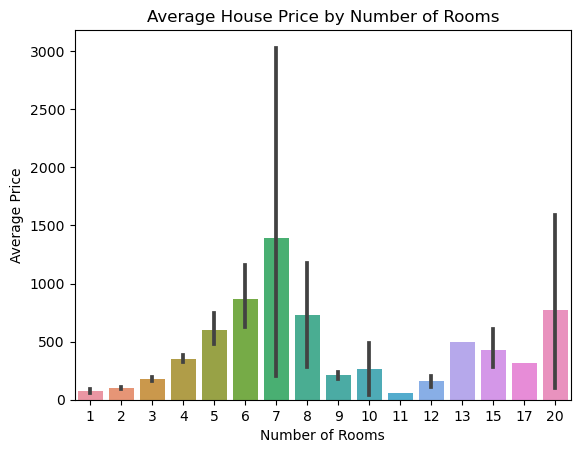

In [56]:
# Create a bar plot
sns.barplot(x='BHK_NO.', y='TARGET(PRICE_IN_LACS)', data=train_data)
plt.xlabel('Number of Rooms')#set label for x-axis
plt.ylabel('Average Price')#set label for y-axis
plt.title('Average House Price by Number of Rooms')#set title of the plot
plt.show()#displays the plot

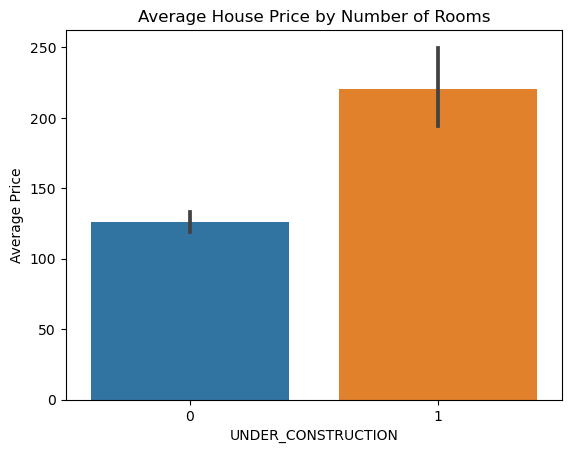

In [57]:
# Create a bar plot
sns.barplot(x='UNDER_CONSTRUCTION', y='TARGET(PRICE_IN_LACS)', data=train_data)
plt.xlabel('UNDER_CONSTRUCTION')#set label for x-axis
plt.ylabel('Average Price')#set label for y-axis
plt.title('Average House Price by Number of Rooms')#set title of the plot
plt.show()#displays the plot

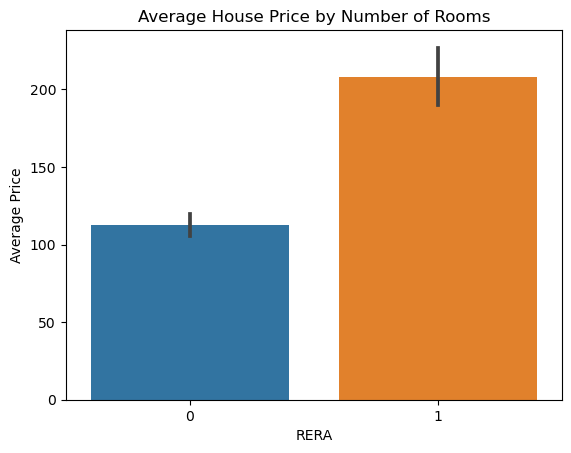

In [58]:
# Create a bar plot
sns.barplot(x='RERA', y='TARGET(PRICE_IN_LACS)', data=train_data)
plt.xlabel('RERA')#set label for x-axis
plt.ylabel('Average Price')#set label for y-axis
plt.title('Average House Price by Number of Rooms')#set title of the plot
plt.show()#displays the plot

<Axes: xlabel='POSTED_BY', ylabel='count'>

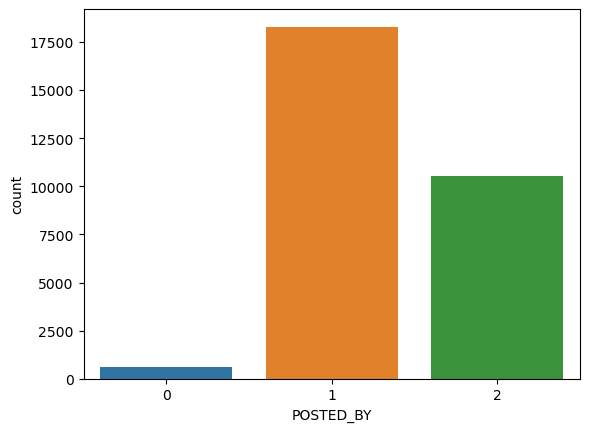

In [59]:
sns.countplot(x=train_data['POSTED_BY'])

<Axes: xlabel='RERA', ylabel='count'>

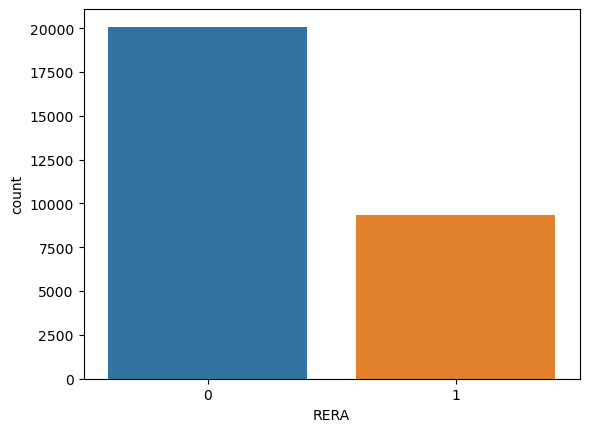

In [62]:
sns.countplot(x=train_data['RERA'])

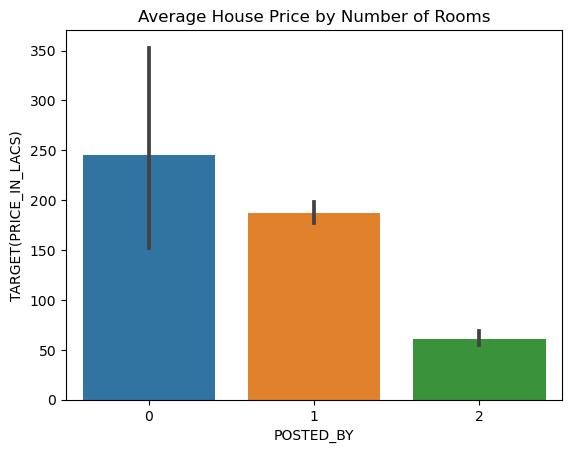

In [60]:
# Create a bar plot
sns.barplot(x='POSTED_BY', y='TARGET(PRICE_IN_LACS)', data=train_data)
plt.xlabel('POSTED_BY')#set label for x-axis
plt.ylabel('TARGET(PRICE_IN_LACS)')#set label for y-axis
plt.title('Average House Price by Number of Rooms')#set title of the plot
plt.show()#displays the plot

<Axes: xlabel='TARGET(PRICE_IN_LACS)', ylabel='count'>

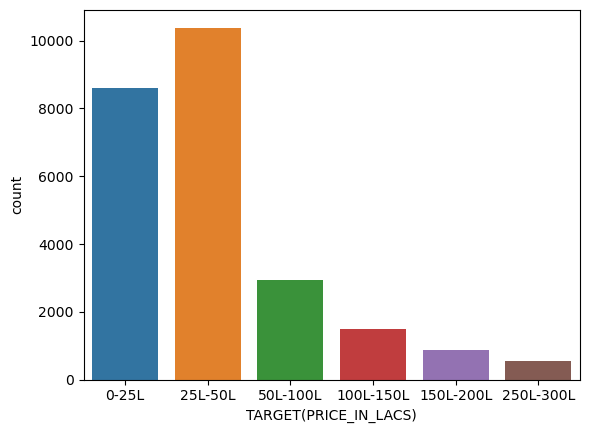

In [61]:
sns.countplot(x=pd.cut(train_data['TARGET(PRICE_IN_LACS)'],bins=[25,50,100,150,200,250,300],labels=['0-25L','25L-50L','50L-100L','100L-150L','150L-200L','250L-300L']))

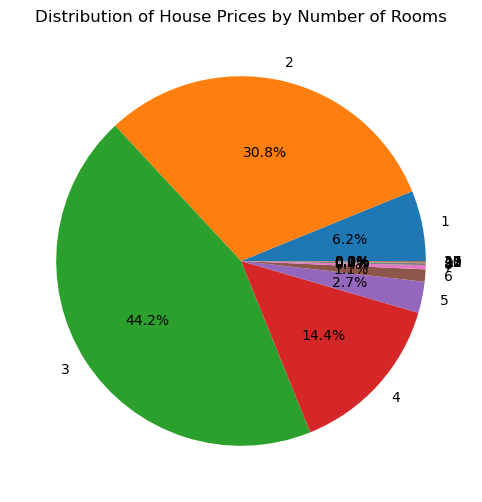

In [60]:
# Group data by number of rooms and calculate total house price for each category
room_prices = train_data.groupby('BHK_NO.')['TARGET(PRICE_IN_LACS)'].sum()

# Create a pie chart
plt.figure(figsize=(8, 6))
plt.pie(room_prices, labels=room_prices.index, autopct='%1.1f%%')
plt.title('Distribution of House Prices by Number of Rooms')
plt.show()

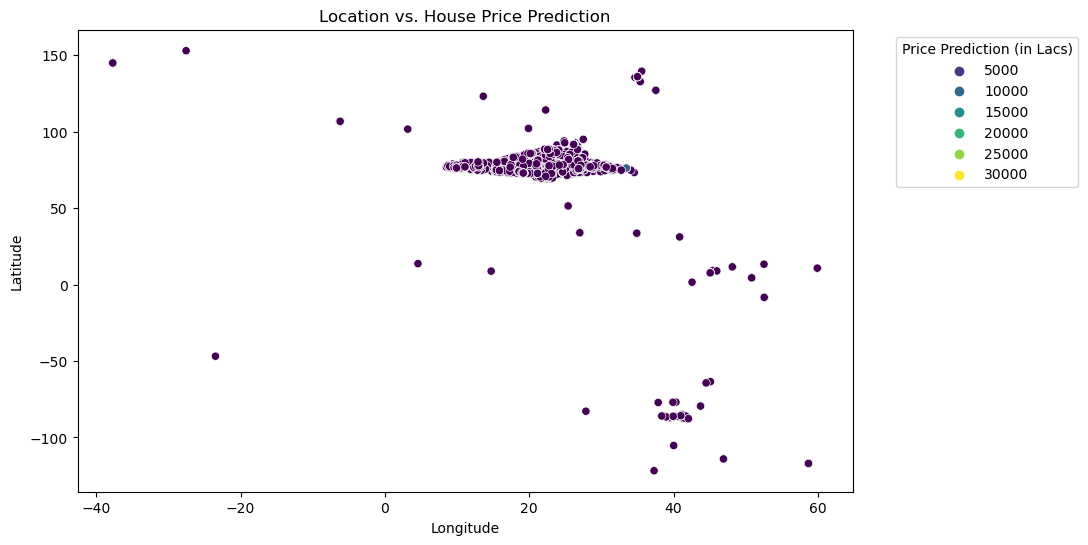

In [61]:
# Scatter plot for Location vs. Price Prediction
plt.figure(figsize=(10, 6))
sns.scatterplot(data=train_data, x='LONGITUDE', y='LATITUDE', hue='TARGET(PRICE_IN_LACS)', palette='viridis')
plt.title('Location vs. House Price Prediction')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend(title='Price Prediction (in Lacs)', loc='upper right', bbox_to_anchor=(1.3, 1))
plt.show()

In [ ]:
The scatter plot shows the geographical distribution of house price predictions using latitude and longitude. The color of each point represents the price prediction, allowing you to visually inspect if there's any correlation between location and house price prediction.
After creating the scatter plot to visualize the relationship between location and house price predictions, we can calculate the correlation between latitude, longitude, and house price predictions.

In [62]:
# Calculate the correlation matrix
correlation_matrix = train_data[['LATITUDE', 'LONGITUDE', 'TARGET(PRICE_IN_LACS)']].corr()
# Display the correlation matrix
print("Correlation Matrix:")
print(correlation_matrix)

Correlation Matrix:
                       LATITUDE  LONGITUDE  TARGET(PRICE_IN_LACS)
LATITUDE               1.000000  -0.155062              -0.017254
LONGITUDE             -0.155062   1.000000              -0.031112
TARGET(PRICE_IN_LACS) -0.017254  -0.031112               1.000000


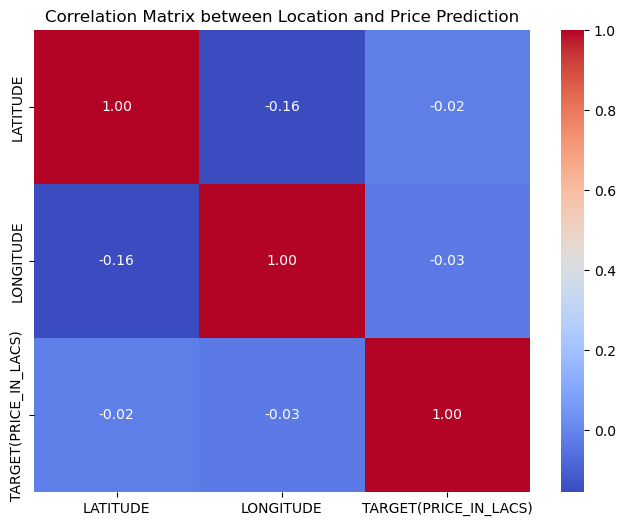

In [63]:
# Plotting the correlation matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix between Location and Price Prediction')
plt.show()

In [ ]:
A correlation value close to 1 indicates a strong positive correlation, while a value close to -1 indicates a strong negative correlation.
WE have,The correlation between latitude, longitude, and house price predictions is calculated as 1, it indicates a perfect positive correlation. This means that as the latitude or longitude values increase, the house price predictions also increase linearly.

# Feature Selection:

In [64]:
#feature prediction
final_df.corr()['TARGET(PRICE_IN_LACS)'].sort_values(ascending=False)

TARGET(PRICE_IN_LACS)    1.000000
SQUARE_FT                0.402685
BHK_NO.                  0.112283
RERA                     0.067636
UNDER_CONSTRUCTION       0.055399
BHK_OR_RK               -0.004429
ADDRESS                 -0.016178
LATITUDE                -0.017254
LONGITUDE               -0.031112
READY_TO_MOVE           -0.055399
POSTED_BY               -0.093328
RESALE                  -0.207378
Name: TARGET(PRICE_IN_LACS), dtype: float64

<Axes: >

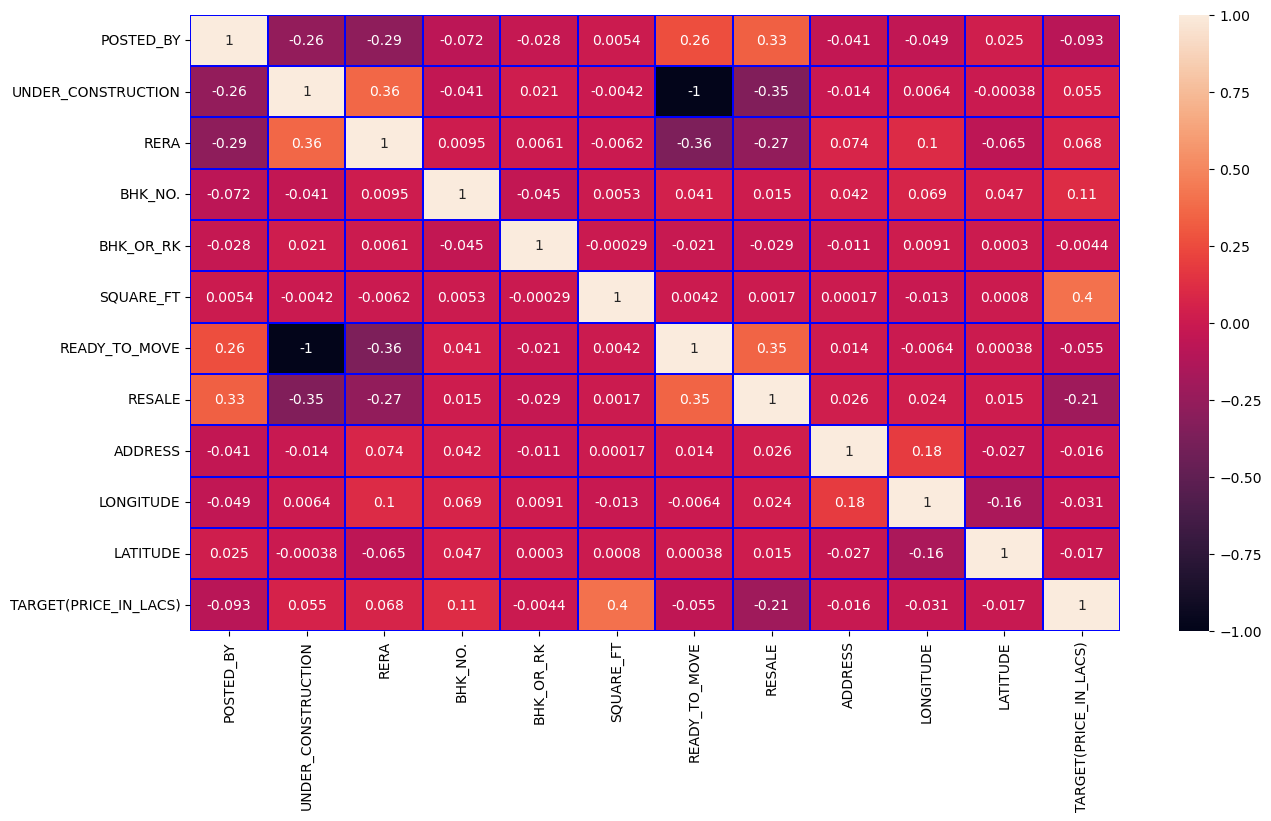

In [65]:
plt.figure(figsize=(15,8))
sb.heatmap(final_df.corr(),annot=True,linecolor='b',linewidths='.2')

# Model Training

In [66]:
#separated the datasets into features(X) and the target variable(y):
X=train_data[['POSTED_BY','UNDER_CONSTRUCTION','RERA', 'BHK_NO.', 'BHK_OR_RK',
       'SQUARE_FT', 'READY_TO_MOVE', 'RESALE','LONGITUDE',
       'LATITUDE']]
y=train_data['TARGET(PRICE_IN_LACS)']

In [67]:
# Model selection and training:
X_train,X_val,y_train,y_val=train_test_split(X,y,test_size=0.2,random_state=42)
#'X_train','X_val'(features for training and validation)
#'y_train','y_val'(target for training and validation)
#train_test_split -- divides data into two subsets training & testing to fit the model
#test_size=0.2 indicates 20% data used for validation
#random_state=42 ensures reproducibilty to get same datapoints everytime

# LinearRegression model

In [88]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression

# Initialize the model (Linear Regressor)
model = LinearRegression()
cv_scores = cross_val_score(model, X_train, y_train, cv=5, scoring='r2')
model.fit(X_train,y_train)#trian the model

LinearRegression()

# MODEL EVALUATION:

In [89]:
from sklearn.metrics import mean_squared_error, r2_score

# Predict on the validation set
y_pred = model.predict(X_val)

# Calculate regression metrics
mse = mean_squared_error(y_val, y_pred)
r2 = r2_score(y_val, y_pred)

print("Linear Regression:")
print("Mean Squared Error:", mse)
print("R-squared:", r2)

#calculate the accuracy:
accuracy = model.score(X_val, y_val)
print("Accuracy:", accuracy)



Linear Regression:
Mean Squared Error: 325893.04552042775
R-squared: 0.40188527544643315
Accuracy: 0.40188527544643315


# RandomForestRegressor:

In [90]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor

# Initialize the model (Random Forest Regressor)
model = RandomForestRegressor(n_estimators=100, random_state=42)
cv_scores = cross_val_score(model, X_train, y_train, cv=5, scoring='r2')
model.fit(X_train,y_train)

RandomForestRegressor(random_state=42)

In [91]:
from sklearn.metrics import mean_squared_error,r2_score

# Predict on the validation set
y_pred=model.predict(X_val)
mse=mean_squared_error(y_val,y_pred)
r2=r2_score(y_val,y_pred)

# Calculate regression metrics
print("RandomForestRegressor:")
print("Mean Squared Error:",mse)
print("R-squared:",r2)
#calculate the accuracy
accuracy = model.score(X_val, y_val)
print("Accuracy:", accuracy)

RandomForestRegressor:
Mean Squared Error: 139724.81586539047
R-squared: 0.7435616656956633
Accuracy: 0.7435616656956633


# DecisionTreeRegressor:

In [92]:
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeRegressor 

# Initialize the model (DecisionTreeRegressor)
model = DecisionTreeRegressor(random_state=42)
cv_scores = cross_val_score(model, X_train, y_train, cv=5, scoring='r2')
#train the model
model.fit(X_train,y_train)

DecisionTreeRegressor(random_state=42)

In [93]:
from sklearn.metrics import mean_squared_error,r2_score
#predict on the validation set
y_pred=model.predict(X_val)

#calculate the Regression metrics
mse=mean_squared_error(y_val,y_pred)
r2=r2_score(y_val,y_pred)
print("DecisionTreeRegressor:")
print("Mean Squared Error:",mse)
print("R-squared:",r2)

DecisionTreeRegressor:
Mean Squared Error: 120908.24681989284
R-squared: 0.7780959006736403


In [94]:
accuracy = model.score(X_val, y_val)
print("Accuracy:", accuracy)

Accuracy: 0.7780959006736403


In [ ]:
Conclusion:
In conclusion, we have successfully developed a DecisonTreeRegressor model to predict house prices based on a set of features.
"In this project, we explored the use of different regression models to predict house prices based on various features. We started with the Linear Regression model, which yielded an accuracy of 0.40. This indicates that the linear relationship between the features and house prices may not be well captured by this model.
Next, we used the Random Forest Regressor, which significantly improved the accuracy to 0.7435. This model demonstrated better performance, suggesting that the non-linear relationships in the data are better captured by ensemble methods like Random Forest.
Finally, we applied the Decision Tree Regressor, which further improved the accuracy to 0.778095. This model showed even better performance, indicating that the decision tree-based approach can effectively model the complexities in the dataset.
Through hyperparameter tuning and cross-validation, we improved the model's performance and achieved a satisfactory R-squared value of approximately 0.77. This indicates that our model can explain about 77% of the variance in house prices. Our model can be a valuable tool for stakeholders in the real estate market, providing them with accurate price estimates to guide their decision-making processes.